# Package Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline


# Import Data

In [2]:
ls

 Volume in drive C is System
 Volume Serial Number is C020-6B65

 Directory of C:\Users\swpatank\OneDrive - Capgemini\Desktop\Data Science Competition

02/25/2019  04:11 PM    <DIR>          .
02/25/2019  04:11 PM    <DIR>          ..
02/22/2019  11:53 AM    <DIR>          .ipynb_checkpoints
02/21/2019  12:47 PM         7,248,931 data_gdsc2_public.csv
02/25/2019  04:11 PM           146,782 IT Lead Time Prediction.ipynb
               2 File(s)      7,395,713 bytes
               3 Dir(s)  148,142,280,704 bytes free


In [3]:
df = pd.read_csv('data_gdsc2_public.csv',  sep=';', parse_dates=['timestamp'])

In [4]:
df.head(10)

,timestamp,work_item,work_type,work_priority,domain,platform,components,from_phase,to_phase,from_resource,to_resource
0,2015-01-02 14:39:14,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,NaN,Analyze,NaN,ER_00043
1,2015-01-02 15:04:20,WI_000002,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,NaN,Analyze,NaN,ER_00225
2,2015-01-02 15:28:22,WI_000003,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,NaN,Analyze,NaN,ER_00225
3,2015-01-02 15:33:54,WI_000004,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,NaN,Analyze,NaN,ER_00225
4,2015-01-02 16:32:11,WI_000005,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,NaN,Analyze,NaN,ER_00206
5,2015-01-02 16:56:27,WI_000006,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,NaN,Analyze,NaN,ER_00206
6,2015-01-03 14:33:10,WI_000007,WT_00002,WP_00003,BD_00001,PL_00001,NaN,NaN,Analyze,NaN,ER_00054
7,2015-01-03 15:16:17,WI_000007,WT_00002,WP_00003,BD_00001,PL_00001,NaN,Analyze,Design,ER_00054,ER_00212
8,2015-01-04 20:57:40,WI_000008,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,NaN,Analyze,NaN,ER_00206
9,2015-01-04 21:28:12,WI_000009,WT_00002,WP_00003,BD_00004,PL_00004,NaN,NaN,Analyze,NaN,ER_00261


# Data Cleaning

In [5]:
df['to_phase'].unique()

array(['Analyze', 'Design', 'Build', 'Test', 'Accept', nan, 'Deploy',
       'Package', 'Clarify'], dtype=object)

In [6]:
df = df.sort_values(by=['work_item', 'timestamp'])

In [7]:
df.from_phase.fillna('Start', inplace=True)  
df.to_phase.fillna('End', inplace=True)
df.components.fillna('0', inplace=True)

In [8]:
df.columns

Index(['timestamp', 'work_item', 'work_type', 'work_priority', 'domain',
       'platform', 'components', 'from_phase', 'to_phase', 'from_resource',
       'to_resource'],
      dtype='object')

### add total time it takes for a work item to be completed to df

In [9]:
total_time = df[['timestamp', 'work_item', 'from_phase', 'to_phase']]

In [10]:
start = total_time[total_time['from_phase'] == 'Start']
end = total_time[total_time['to_phase'] == 'End']

In [11]:
start.columns = ['timestamp_start', 'work_item', 'from_phase', 'to_phase']
end.columns = ['timestamp_end', 'work_item', 'from_phase', 'to_phase'] 

In [12]:
start.drop(['from_phase', 'to_phase'], axis = 1, inplace = True)
end.drop(['from_phase', 'to_phase'], axis = 1, inplace = True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
time_diff = start.merge(end)

In [14]:
time_diff.head()

,timestamp_start,work_item,timestamp_end
0,2015-01-02 14:39:14,WI_000001,2015-01-27 11:36:51
1,2015-01-02 15:04:20,WI_000002,2015-01-14 09:46:37
2,2015-01-02 15:28:22,WI_000003,2015-02-26 11:50:37
3,2015-01-02 15:33:54,WI_000004,2015-01-28 09:11:05
4,2015-01-02 16:32:11,WI_000005,2015-02-04 12:57:49


In [15]:
time_diff['total_time'] = time_diff['timestamp_end'] - time_diff['timestamp_start']

In [16]:
time_diff.drop(['timestamp_start', 'timestamp_end'], axis = 1, inplace = True)

In [17]:
df = df.merge(time_diff)

In [18]:
df

,timestamp,work_item,work_type,work_priority,domain,platform,components,from_phase,to_phase,from_resource,to_resource,total_time
0,2015-01-02 14:39:14,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,0,Start,Analyze,NaN,ER_00043,24 days 20:57:37
1,2015-01-05 11:48:08,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,0,Analyze,Design,ER_00043,ER_00149,24 days 20:57:37
2,2015-01-05 12:35:59,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,0,Design,Analyze,ER_00149,ER_00149,24 days 20:57:37
3,2015-01-07 11:04:51,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,0,Analyze,Design,ER_00149,ER_00043,24 days 20:57:37
4,2015-01-07 14:04:44,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,0,Design,Analyze,ER_00043,ER_00149,24 days 20:57:37
5,2015-01-07 14:07:56,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,0,Analyze,Design,ER_00149,ER_00043,24 days 20:57:37
6,2015-01-07 14:37:35,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,0,Design,Build,ER_00043,ER_00149,24 days 20:57:37
7,2015-01-13 10:25:36,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,0,Build,Test,ER_00149,ER_00058,24 days 20:57:37
8,2015-01-15 11:04:02,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,0,Test,Package,ER_00058,ER_00149,24 days 20:57:37
9,2015-01-19 08:54:54,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,0,Package,Accept,ER_00149,ER_00149,24 days 20:57:37


# Feature Engineering

### Work Priority

In [19]:
wp = df[['work_item', 'work_priority']]

In [20]:
wp.drop_duplicates(keep = 'first', inplace = True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Work Type

In [21]:
wt = df[['work_item', 'work_type']]

In [22]:
wt.drop_duplicates(keep = 'first', inplace = True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Domain

In [23]:
domain = df[['work_item', 'domain']]

In [24]:
domain.drop_duplicates(keep = 'first', inplace = True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Platform

In [25]:
platform = df[['work_item', 'platform']]

In [26]:
platform.drop_duplicates(keep = 'first', inplace = True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Component Combination

In [27]:
component = df[['work_item', 'components']]

In [28]:
component.drop_duplicates(keep = 'first', inplace = True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Number of Components

In [29]:
comp_list = []

for comp in component['components']:
    if comp == '0':
        comp_list.append(0)
    else:
        comp_list.append(1)

### Season

In [30]:
tt = df[['work_item', 'timestamp']]
tt.drop_duplicates(keep = 'first', inplace = True)
tt = tt['timestamp']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
season = []

for a in tt.dt.month:
    if a <= 2:
        season.append('Winter')
    elif a <= 5:
        season.append('Spring')
    elif a <= 8:
        season.append('Summer')
    elif a <= 11:
        season.append('Fall')
    else:
        season.append('Winter')

### Month

In [32]:
month = pd.DataFrame({'Month' : tt.dt.month})

### Morning or Afternoon

In [33]:
time = tt.dt.hour
time_of_day = []

for t in time:
    if t < 12:
        time_of_day.append('Morning')
    else:
        time_of_day.append('Afternoon')

### Hour of Day

In [34]:
hour = tt.dt.hour

### Initial Resource working on Project

In [35]:
init_resource = df[df['from_phase'] == 'Start']

In [36]:
init_resource = pd.Series(init_resource['to_resource'])

In [37]:
init_resource = init_resource.reset_index()

In [38]:
init_resource.drop('index', axis = 1, inplace = True)

In [39]:
init_resource.columns = ['Initial Resource'] 

### # of projects which are currently ongoing

In [40]:
ongoing = df[['timestamp', 'work_item', 'from_phase', 'to_phase']] 

In [41]:
a = ongoing[ongoing['from_phase'] == 'Start']
b = ongoing[ongoing['to_phase'] == 'End']

In [42]:
a.drop(['from_phase', 'to_phase'], axis = 1, inplace = True)
b.drop(['from_phase', 'to_phase'], axis = 1, inplace = True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
a.columns = ['Start', 'work_item']
b.columns = ['End', 'work_item']

In [44]:
ongoing = a.merge(b)

In [45]:
ongoing = ongoing[['work_item', 'Start', 'End']]

In [46]:
ongoing['total_time'] = ongoing['End'] - ongoing['Start']

In [47]:
ongoing.head()

,work_item,Start,End,total_time
0,WI_000001,2015-01-02 14:39:14,2015-01-27 11:36:51,24 days 20:57:37
1,WI_000002,2015-01-02 15:04:20,2015-01-14 09:46:37,11 days 18:42:17
2,WI_000003,2015-01-02 15:28:22,2015-02-26 11:50:37,54 days 20:22:15
3,WI_000004,2015-01-02 15:33:54,2015-01-28 09:11:05,25 days 17:37:11
4,WI_000005,2015-01-02 16:32:11,2015-02-04 12:57:49,32 days 20:25:38


### new category for how fast projects were completed

In [48]:
fast = df[['timestamp', 'work_item', 'from_phase', 'to_phase', 'total_time']] 

In [49]:
a = fast[fast['from_phase'] == 'Start']
b = fast[fast['to_phase'] == 'End']

In [50]:
a.drop(['timestamp', 'from_phase', 'to_phase'], axis = 1, inplace = True)
b.drop(['timestamp', 'from_phase', 'to_phase'], axis = 1, inplace = True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [51]:
fast = a.merge(b)

In [52]:
fast['total_time'] = fast['total_time'].apply(lambda x : x.total_seconds())
fast['total_time'] = fast['total_time'].apply(lambda x: (((x/60)/60)/24) )

In [53]:
fast.sort_values(by = 'total_time', inplace = True)

In [54]:
how_fast = []

for time in fast['total_time']:
    if time < 1:
        how_fast.append('Less than 1 day')
    elif time < 10:
        how_fast.append('Less than 10 days')
    elif time < 100:
        how_fast.append('Less than 100 days')
    else:
        how_fast.append('Not very fast')

In [55]:
fast['how fast'] = how_fast

In [56]:
#fast.drop('total_time', axis = 1, inplace = True)

In [57]:
fast.drop('total_time', axis = 1, inplace = True)

# DF with features

In [58]:
final_df = df[['work_item']]

In [59]:
final_df.drop_duplicates(inplace = True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
final_df = final_df.merge(wp)
final_df = final_df.merge(wt, on = 'work_item')
final_df = final_df.merge(domain, on = 'work_item')
final_df = final_df.merge(platform, on = 'work_item')
final_df['Component?'] = pd.Series(comp_list)
final_df['Season'] = pd.Series(season)
final_df['Month'] = month
final_df['Time of Day'] = pd.Series(time_of_day)
final_df['Hour'] = hour
final_df = pd.concat([final_df, init_resource],axis = 1)
final_df = final_df.merge(fast)




In [61]:
final_df.head()

,work_item,work_priority,work_type,domain,platform,Component?,Season,Month,Time of Day,Hour,Initial Resource,how fast
0,WI_000001,WP_00003,WT_00001,BD_00001,PL_00001,0,Winter,1,Afternoon,14,ER_00043,Less than 100 days
1,WI_000002,WP_00004,WT_00002,BD_00002,PL_00002,1,Winter,1,Morning,11,ER_00225,Less than 100 days
2,WI_000003,WP_00004,WT_00002,BD_00002,PL_00002,1,Winter,1,Afternoon,12,ER_00225,Less than 100 days
3,WI_000004,WP_00004,WT_00002,BD_00002,PL_00002,1,Winter,1,Morning,11,ER_00225,Less than 100 days
4,WI_000005,WP_00003,WT_00002,BD_00003,PL_00003,1,Winter,1,Afternoon,14,ER_00206,Less than 100 days


### add total time to final_df

In [62]:
total_time = df[['work_item', 'total_time']]

In [63]:
total_time.drop_duplicates(inplace = True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
final_df = final_df.merge(total_time, on = 'work_item')

# Final DataFrame

In [65]:
final_df.head(10)

,work_item,work_priority,work_type,domain,platform,Component?,Season,Month,Time of Day,Hour,Initial Resource,how fast,total_time
0,WI_000001,WP_00003,WT_00001,BD_00001,PL_00001,0,Winter,1,Afternoon,14,ER_00043,Less than 100 days,24 days 20:57:37
1,WI_000002,WP_00004,WT_00002,BD_00002,PL_00002,1,Winter,1,Morning,11,ER_00225,Less than 100 days,11 days 18:42:17
2,WI_000003,WP_00004,WT_00002,BD_00002,PL_00002,1,Winter,1,Afternoon,12,ER_00225,Less than 100 days,54 days 20:22:15
3,WI_000004,WP_00004,WT_00002,BD_00002,PL_00002,1,Winter,1,Morning,11,ER_00225,Less than 100 days,25 days 17:37:11
4,WI_000005,WP_00003,WT_00002,BD_00003,PL_00003,1,Winter,1,Afternoon,14,ER_00206,Less than 100 days,32 days 20:25:38
5,WI_000006,WP_00003,WT_00002,BD_00003,PL_00003,1,Winter,1,Afternoon,14,ER_00206,Less than 100 days,32 days 20:00:59
6,WI_000007,WP_00003,WT_00002,BD_00001,PL_00001,0,Winter,1,Afternoon,14,ER_00054,Less than 100 days,15 days 19:50:21
7,WI_000008,WP_00003,WT_00002,BD_00003,PL_00003,1,Winter,1,Morning,10,ER_00206,Less than 10 days,8 days 12:00:53
8,WI_000009,WP_00003,WT_00002,BD_00004,PL_00004,0,Winter,1,Morning,11,ER_00261,Less than 10 days,1 days 17:24:13
9,WI_000010,WP_00003,WT_00002,BD_00003,PL_00003,1,Winter,1,Morning,8,ER_00206,Less than 100 days,50 days 23:21:10


In [66]:
final_df.columns

Index(['work_item', 'work_priority', 'work_type', 'domain', 'platform',
       'Component?', 'Season', 'Month', 'Time of Day', 'Hour',
       'Initial Resource', 'how fast', 'total_time'],
      dtype='object')

In [67]:
temp_df = pd.get_dummies(data = final_df, columns = ['work_priority', 'work_type', 'domain', 'platform',
       'Season', 'Time of Day', 'Initial Resource', 'how fast'])

In [68]:
temp_df = temp_df.iloc[:,5:]

In [69]:
temp_df.head()

,work_priority_WP_00001,work_priority_WP_00002,work_priority_WP_00003,work_priority_WP_00004,work_priority_WP_00005,work_type_WT_00001,work_type_WT_00002,work_type_WT_00003,domain_BD_00001,domain_BD_00002,...,Initial Resource_ER_00287,Initial Resource_ER_00288,Initial Resource_ER_00289,Initial Resource_ER_00290,Initial Resource_ER_00291,Initial Resource_ER_00292,how fast_Less than 1 day,how fast_Less than 10 days,how fast_Less than 100 days,how fast_Not very fast
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
final = final_df['Component?']

In [71]:
final = pd.concat([final, temp_df],axis = 1)

In [72]:
final.head()

,Component?,work_priority_WP_00001,work_priority_WP_00002,work_priority_WP_00003,work_priority_WP_00004,work_priority_WP_00005,work_type_WT_00001,work_type_WT_00002,work_type_WT_00003,domain_BD_00001,...,Initial Resource_ER_00287,Initial Resource_ER_00288,Initial Resource_ER_00289,Initial Resource_ER_00290,Initial Resource_ER_00291,Initial Resource_ER_00292,how fast_Less than 1 day,how fast_Less than 10 days,how fast_Less than 100 days,how fast_Not very fast
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
final_df['total_time'] = final_df['total_time'].apply(lambda x : x.total_seconds())
final_df['total_time'] = final_df['total_time'].apply(lambda x: (((x/60)/60)/24) )

In [74]:
final = pd.concat([final, final_df['total_time']],axis = 1)

In [75]:
final.shape

(10522, 288)

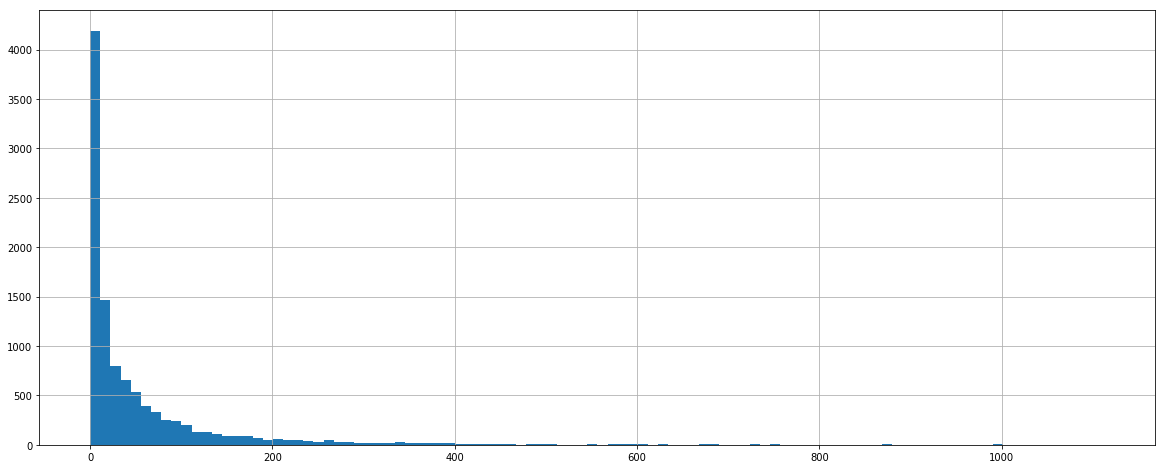

In [76]:
final['total_time'].hist(bins = 100, figsize = (20,8))

In [77]:
# remove outliers
final = final[final['total_time'] < 250]

In [78]:
final.shape

(10023, 288)

In [79]:
# let's remove columns with less than N observations for each feature
#final = final[final.columns[final.sum()>100]]

In [80]:
final.head()

,Component?,work_priority_WP_00001,work_priority_WP_00002,work_priority_WP_00003,work_priority_WP_00004,work_priority_WP_00005,work_type_WT_00001,work_type_WT_00002,work_type_WT_00003,domain_BD_00001,...,Initial Resource_ER_00288,Initial Resource_ER_00289,Initial Resource_ER_00290,Initial Resource_ER_00291,Initial Resource_ER_00292,how fast_Less than 1 day,how fast_Less than 10 days,how fast_Less than 100 days,how fast_Not very fast,total_time
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,24.873345
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,11.779363
2,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,54.848785
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,25.734155
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,32.851134


# KNN Regression Model

In [81]:
X = final.iloc[:,:-1]
y = final.iloc[:,len(final.columns)-1]

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [83]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [84]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 39.43487938183743
RMSE value for k=  2 is: 34.76671655309034
RMSE value for k=  3 is: 33.00720369485273
RMSE value for k=  4 is: 31.63826370449721
RMSE value for k=  5 is: 31.205019029676695
RMSE value for k=  6 is: 31.075482536968263
RMSE value for k=  7 is: 30.957765055869974
RMSE value for k=  8 is: 30.51618965017686
RMSE value for k=  9 is: 30.80993561018473
RMSE value for k=  10 is: 30.6748477032762
RMSE value for k=  11 is: 30.795832560395745
RMSE value for k=  12 is: 31.024447860722272
RMSE value for k=  13 is: 31.049516894511388
RMSE value for k=  14 is: 31.18640911531121
RMSE value for k=  15 is: 31.187523999037325
RMSE value for k=  16 is: 31.261339273693356
RMSE value for k=  17 is: 31.232308552829977
RMSE value for k=  18 is: 31.382192379905177
RMSE value for k=  19 is: 31.475510366103244
RMSE value for k=  20 is: 31.590793356568096


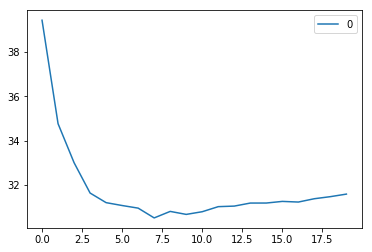

In [85]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [120]:
model = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'distance')

model.fit(X_train, y_train)  #fit the model
y_pred=model.predict(X_test) #make prediction on entire data set


In [121]:
predictions = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

In [122]:
predictions.head()

,Actual,Predicted
6339,4.304792,6.395486
6062,6.020405,5.485583
8788,2.259167,5.745734
9342,16.755324,18.341927
5553,20.069074,39.831354


# Calculate RMSLE

In [123]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [124]:
RMSLE = sqrt(mean_squared_log_error(predictions['Actual'], predictions['Predicted']))
RMSLE

0.9630580231984215

# Further Data Exploration

In [91]:
### it seems like the model works well when the lead time is longer than 1 day
### maybe  lead times less than a day have something in common?

In [92]:
fastest = final[final['total_time'] < 1]

In [93]:
# narrow down columns to ones which have greater than 10 instances
fastest = fastest[fastest.columns[fastest.sum() > 10]]

In [94]:
fastest_total_time = fastest['total_time']

In [95]:
fastest = fastest.iloc[:,:-1]

In [96]:
total_time_corr = fastest.corrwith(fastest_total_time)

In [97]:
# its interesting that the top 2 results have the same correlation - maybe they both indicate simple problems and short lead time
total_time_corr.sort_values(ascending = False).head(10)

platform_PL_00002            0.141901
domain_BD_00002              0.141901
Component?                   0.119404
Initial Resource_ER_00028    0.094409
Initial Resource_ER_00061    0.080705
domain_BD_00003              0.072457
Initial Resource_ER_00206    0.069121
Initial Resource_ER_00219    0.061213
Initial Resource_ER_00072    0.059640
platform_PL_00003            0.057866
dtype: float64

In [98]:
temp = df[df['platform'] == 'PL_00002']

In [99]:
temp = temp.sort_values(by = 'total_time', ascending = True)

In [100]:
temp = temp[['work_item', 'from_phase', 'to_phase','platform', 'total_time']]

In [101]:
a = temp[temp['from_phase'] == 'Start']
b = temp[temp['to_phase'] == 'End']

In [102]:
a = a.drop(['from_phase', 'to_phase'], axis = 1)
b = b.drop(['from_phase', 'to_phase'], axis = 1)

In [103]:
temp = a.merge(b, on = 'work_item', how = 'inner')

In [107]:
temp = temp[['work_item', 'platform_x', 'total_time_x']]

In [109]:
temp.columns = ['work_item', 'platform', 'total_time']

In [114]:
temp['total_time'] = temp['total_time'].apply(lambda x : x.total_seconds())

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
temp['total_time'] = temp['total_time'].apply(lambda x : (((x/60)/60)/24))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
